** Combining Naive Bayes, SVM and KNN ** 

In [2]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 0.668537427879 Recall 0.655728219181
N Fold Precision = 0.647930314503 Recall 0.638440631366
N Fold Precision = 0.642642614951 Recall 0.629975621604
N Fold Precision = 0.643213602598 Recall 0.633444352001
N Fold Precision = 0.646987345988 Recall 0.626925637505
N Fold Precision = 0.657693341223 Recall 0.648361662152
N Fold Precision = 0.666704723616 Recall 0.650066638868
N Fold Precision = 0.663630300063 Recall 0.642619717948
N Fold Precision = 0.668387376845 Recall 0.657687188209
N Fold Precision = 0.653782876954 Recall 0.645640884786
Overall Precision = 0.655950992462 Recall 0.642889055362


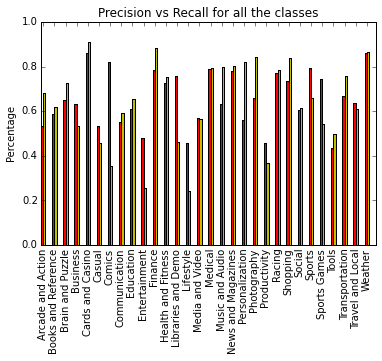

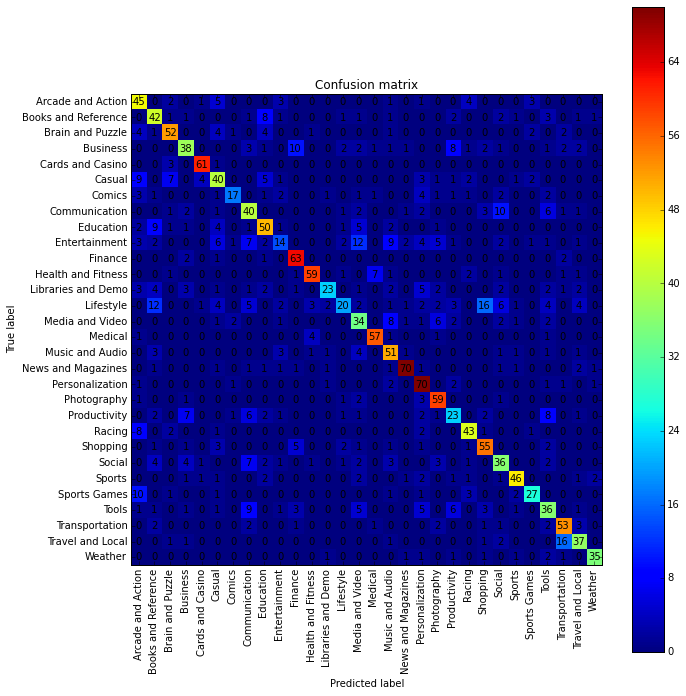

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import linear_model
from sklearn.decomposition import TruncatedSVD

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = MultinomialNB()
    predict_labels_arr1 = clf.fit(train_data, train_labels).predict(test_data)
    
    clf = svm.LinearSVC()
    clf.fit(train_data, train_labels)
    predict_labels_arr2 = clf.predict(test_data)
    
    svd = TruncatedSVD(n_components=200, random_state=42)
    reduced_train_data = svd.fit_transform(train_data)
    clf = KNeighborsClassifier(n_neighbors=100) 
    clf.fit(reduced_train_data, train_labels)
    reduced_test_data = svd.transform(test_data)
    predict_labels_arr3 = clf.predict(reduced_test_data)
    
    predict_labels_arr = []
    for elem in zip(predict_labels_arr1,predict_labels_arr2,predict_labels_arr3):
        if (elem[0] == elem[1]) or (elem[0] == elem[2]):
            predict_labels_arr.append(elem[0])
        elif (elem[1] == elem[2]):
            predict_labels_arr.append(elem[1])
        else:
            predict_labels_arr.append(elem[1])
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
print("Overall Precision = {0} Recall {1}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall)))
plot_precision_and_recall(average_precision, average_recall, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)
